In [1]:
data = "./data"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [3]:
import os

confirmed_df = pd.read_csv(os.path.join(data, "time_series_covid_19_confirmed.csv"))
deaths_df = pd.read_csv(os.path.join(data, "time_series_covid_19_deaths.csv"))
recoveries_df = pd.read_csv(os.path.join(data, "time_series_covid_19_recovered.csv"))

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [5]:
cols = confirmed_df.keys()

In [6]:
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype='object')


In [7]:
confirmed = confirmed_df.loc[:, cols[4]: cols[-1]]
deaths = deaths_df.loc[:, cols[4]: cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]: cols[-1]]

In [8]:
print(confirmed)

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          2        3        5        7        8        8       14       14   
1          2        1        2        2        4        4        7        7   
2          0        1        3        3        4        5        7        7   
3          0        0        0        1        1        1        1        1   
4          0        0        0        3        4        4        4        7   
..       ...      ...      ...      ...      ...      ...      ...      ...   
463        0        0        0        0        0        0        0        0   
464        0        0        0        0        0        0        0        0   
465        0        0        0        0        0        0        0        0   
466        0        0        0        0        0        0        0        0   
467        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  3/10/20  3/11/20  3/12/

In [9]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate  = []
recovery_rate = []
total_recovered = []
total_active = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/ confirmed_sum)
    recovery_rate.append(recovered_sum/ confirmed_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)

In [29]:
# # numpy test
# x = np.array([[2,3,4,4], [5,6,7,8]])
# x.reshape(-1,8 )
# # numpy test complete

array([[2, 3, 4, 4, 5, 6, 7, 8]])

In [10]:
print(np.array([i for i in range(len(dates))]).reshape(-1,1))

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]]


In [11]:
day_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [12]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+ days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [13]:
print(future_forecast)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]]


In [15]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
print(start_date)
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')) 
    

2020-01-22 00:00:00


In [16]:
print(future_forecast_dates)

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020']


In [17]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(day_since_1_22, world_cases, test_size=0.15, shuffle=False)
# remember its day_since_1_22

In [19]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# X, y = np.arange(10).reshape((5,2)), range(5)
# print(X)

# print(list(y))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

[[0 1]
 [6 7]]
[0, 3]
[[2 3]
 [8 9]
 [4 5]]
[1, 4, 2]


In [24]:
# # to find optimal paramtersfor SVR
# # it takes a lot of time
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3,4,5]

# svm_grid = {'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1) 
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [25]:
# svm_search.best_params_
# svm_confirmed = svm_

In [26]:
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma = 0.01, epsilon=1, degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

c:\installs\anaconda\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 31848.57949839592
MSE: 1031875611.699894


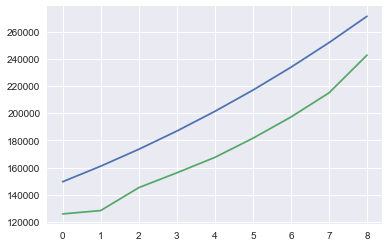

In [27]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred,y_test_confirmed))

MAE: 47357.20501379248
MSE: 3225660149.289032


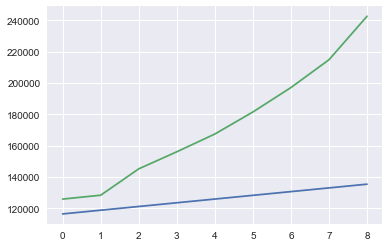

In [31]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)
# its forecast with an e
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

In [32]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[2375.28963286]]
0.0


In [34]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2': alpha_2, 'lambda_1': lambda_1, 'lambda_2': lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.7s finished
c:\installs\anaconda\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\installs\anaconda\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=True, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [35]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-05,
 'lambda_1': 1e-07,
 'alpha_2': 1e-07,
 'alpha_1': 0.0001}

In [36]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 43915.844618325245
MSE: 2885227888.240198


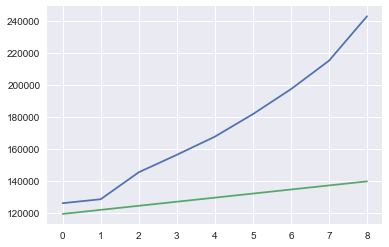

In [37]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

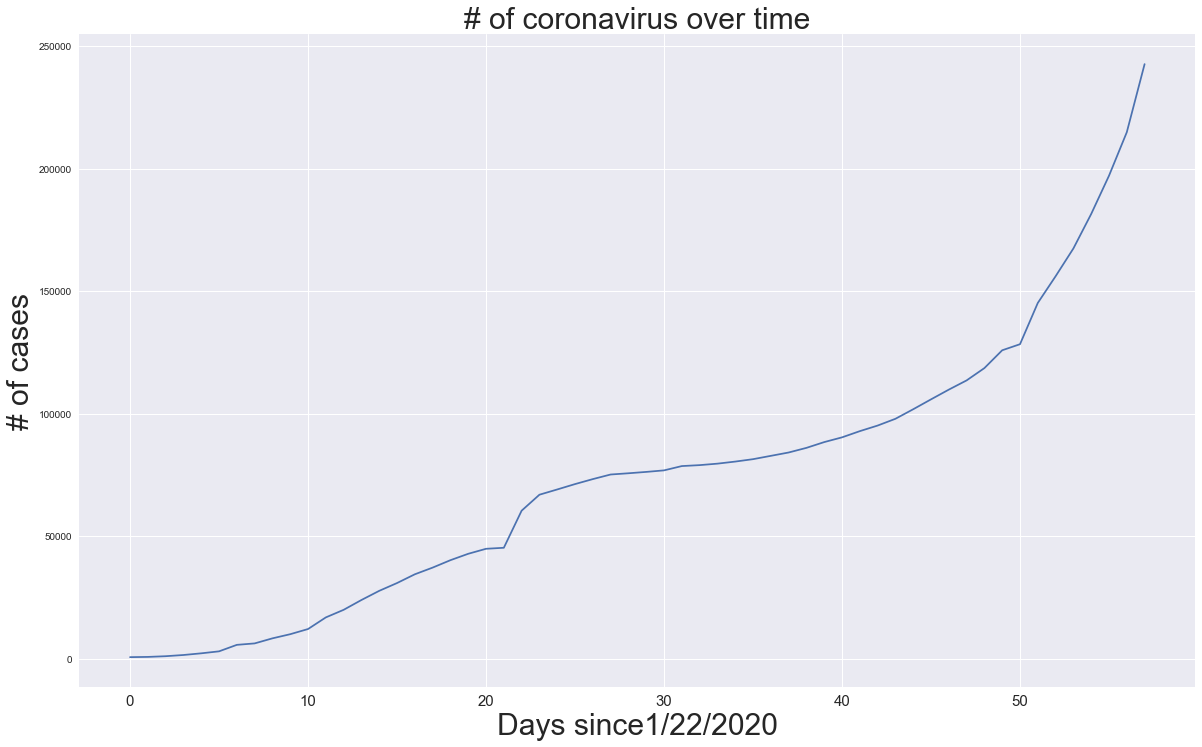

In [38]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('# of coronavirus over time', size=30)
plt.xlabel('Days since1/22/2020', size=30)
plt.ylabel('# of cases', size=30)
plt.xticks(size=15)
plt.show()

In [78]:
def plot_covid_figure(w,x,y=[None],z=[None]):
    plt.figure(figsize=(20,12))
    plt.plot(w, x)
    if(y[0]!= None):
        plt.plot(y,z, linestyle='dashed', color='purple')
    plt.title(' # of Coronavirus Cases over time', size=30)
    plt.xlabel('Time', size=30)
    plt.ylabel('# of cases', size=30)
    # plt.legend(['confirmed cases'], [z])
    plt.xticks(size=15)
    plt.show()

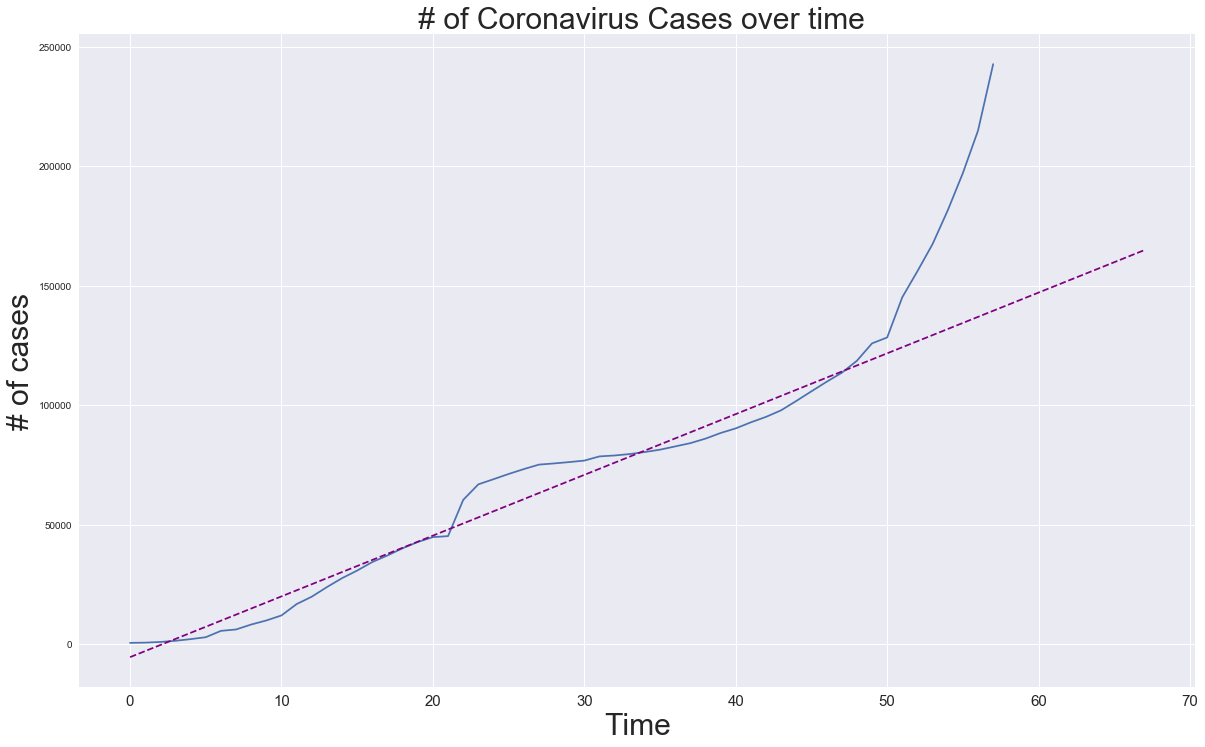

In [79]:
plot_covid_figure(adjusted_dates, world_cases, future_forecast, bayesian_pred)

In [41]:
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/20/2020', 292130.13629738847),
 ('03/21/2020', 314465.91605255054),
 ('03/22/2020', 338368.42021541577),
 ('03/23/2020', 363918.66278149886),
 ('03/24/2020', 391200.40359560633),
 ('03/25/2020', 420300.194116015),
 ('03/26/2020', 451307.42317860667),
 ('03/27/2020', 484314.3627610393),
 ('03/28/2020', 519416.213746896),
 ('03/29/2020', 556711.1516898265)}

In [45]:
print('Bayesian prediction:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

Bayesian prediction:


{('03/20/2020', 292130.13629738847),
 ('03/21/2020', 314465.91605255054),
 ('03/22/2020', 338368.42021541577),
 ('03/23/2020', 363918.66278149886),
 ('03/24/2020', 391200.40359560633),
 ('03/25/2020', 420300.194116015),
 ('03/26/2020', 451307.42317860667),
 ('03/27/2020', 484314.3627610393),
 ('03/28/2020', 519416.213746896),
 ('03/29/2020', 556711.1516898265)}

In [44]:
print("Linear regression prediction")
print(linear_pred[-10:])

Linear regression prediction
[[137766.79870608]
 [140142.08833894]
 [142517.37797181]
 [144892.66760467]
 [147267.95723753]
 [149643.2468704 ]
 [152018.53650326]
 [154393.82613612]
 [156769.11576899]
 [159144.40540185]]


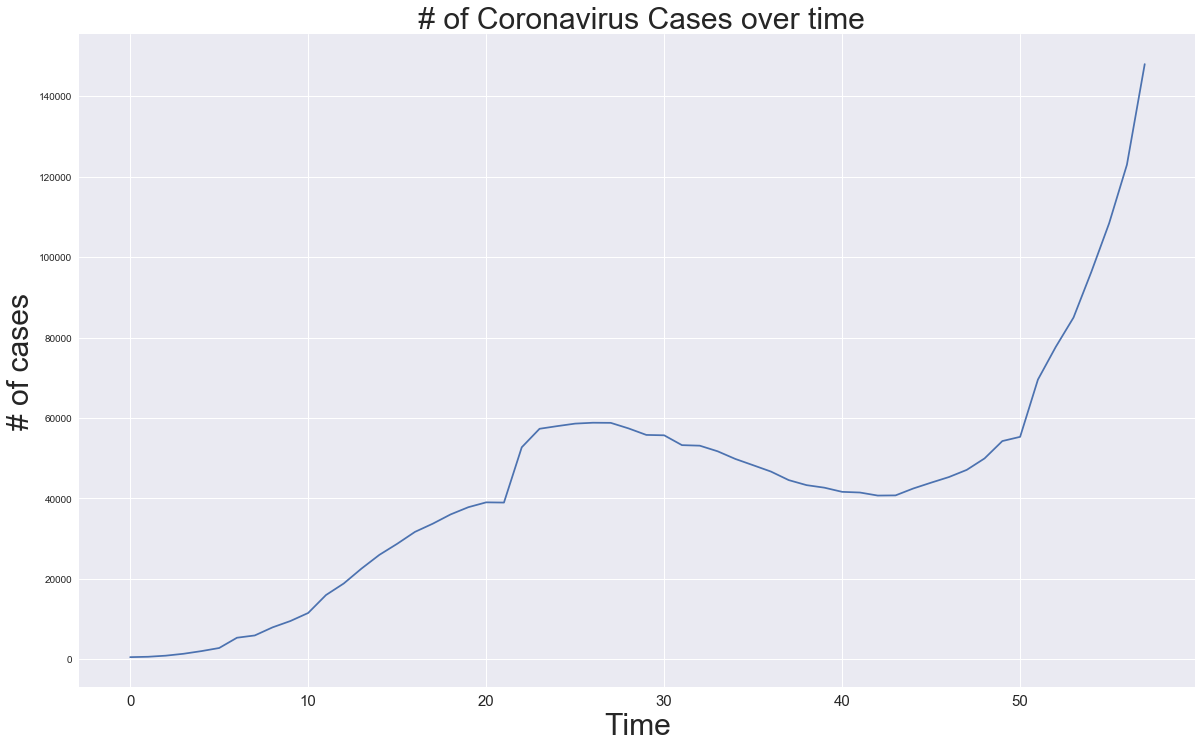

In [63]:
plot_covid_figure(adjusted_dates, total_active)

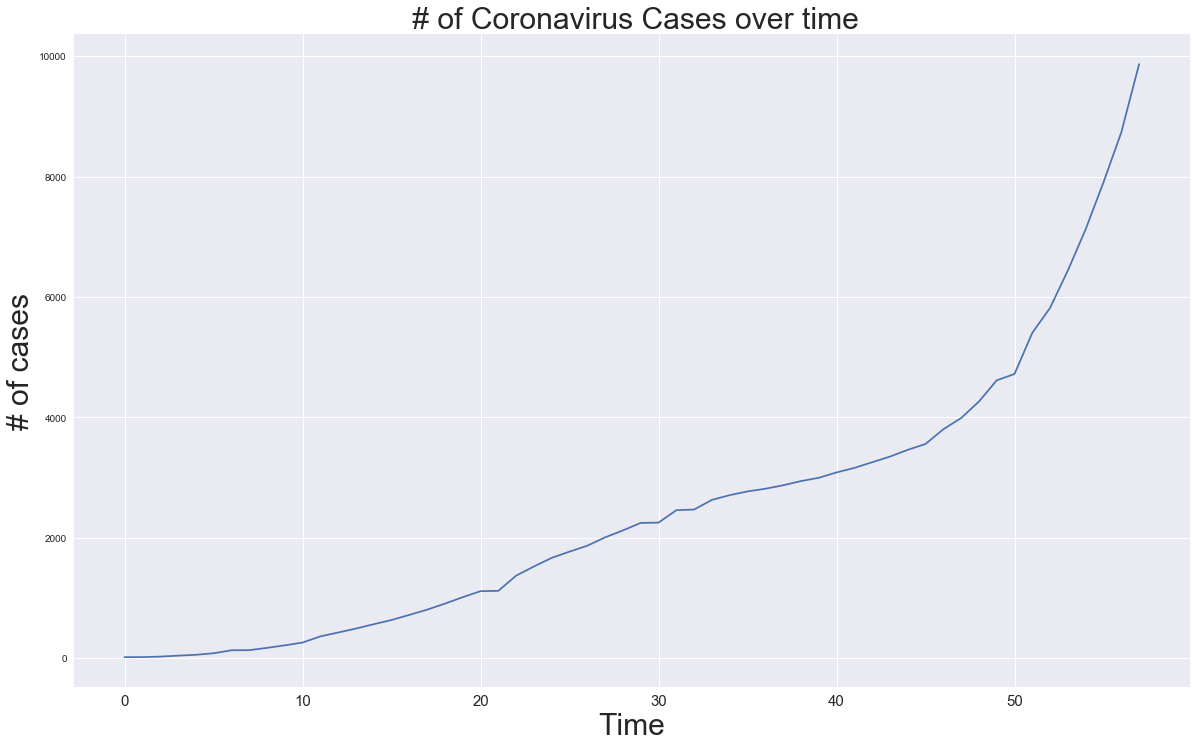

In [65]:
plot_covid_figure(adjusted_dates, total_deaths)

In [67]:
mean_mortality_rate = np.mean(mortality_rate)
print(mean_mortality_rate)

0.029506712203530717


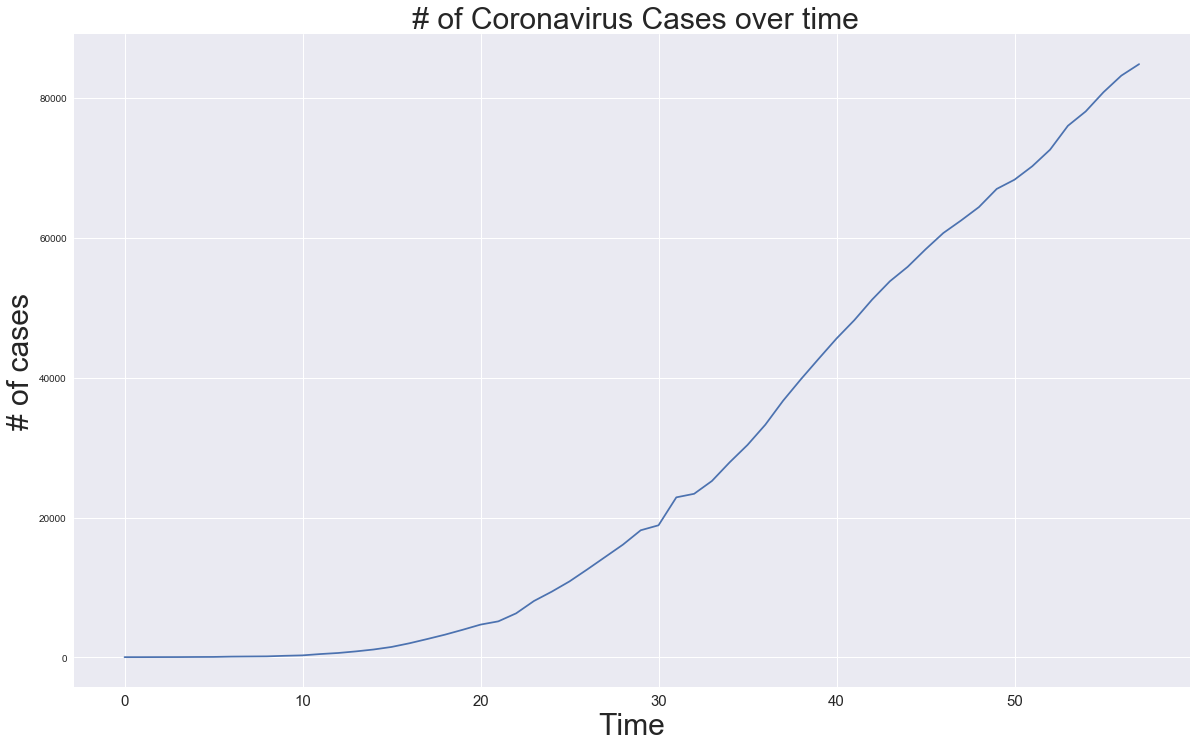

In [70]:
plot_covid_figure(adjusted_dates, total_recovered)

In [71]:
mean_recovery_rate = np.mean(recovery_rate)
print(mean_recovery_rate)

0.25691580273052944


In [73]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

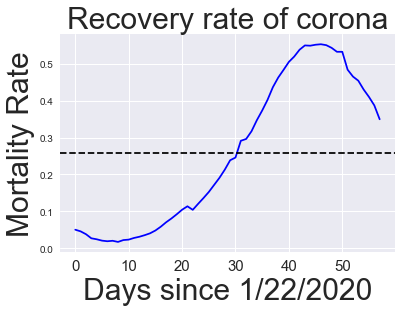

In [81]:
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate, linestyle='--', color='black')
plt.title('Recovery rate of corona', size =30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

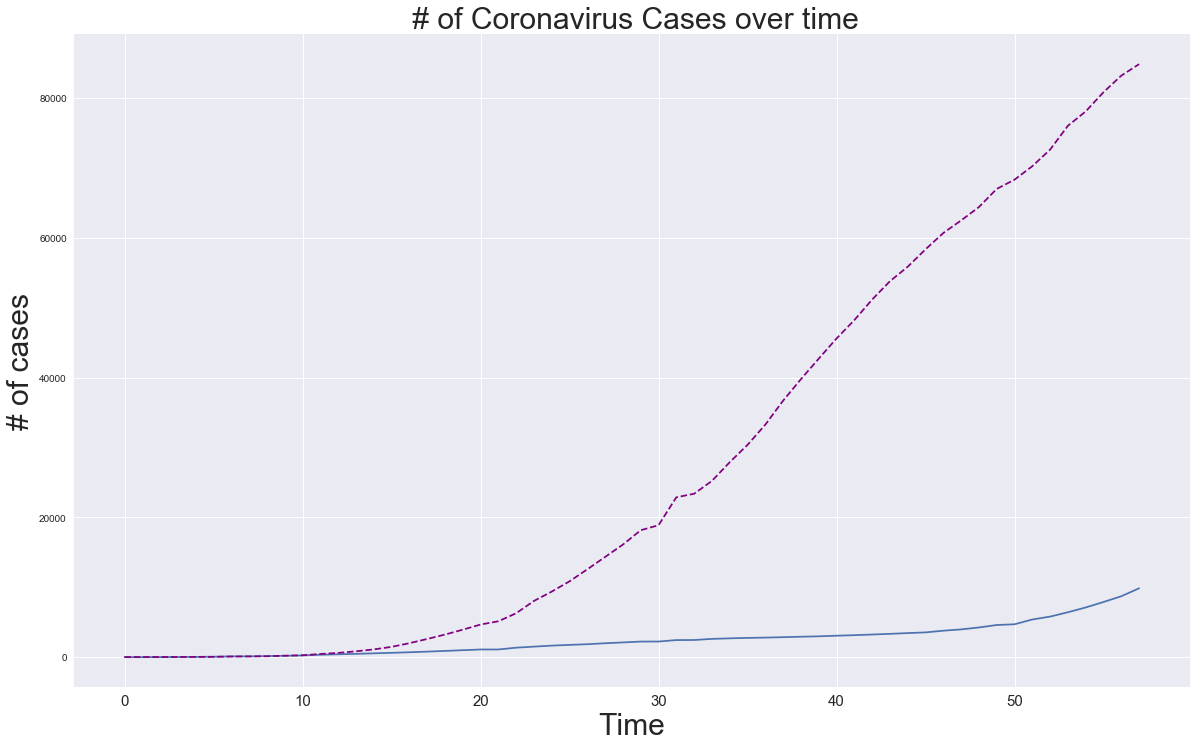

In [82]:
plot_covid_figure(adjusted_dates, total_deaths,adjusted_dates, total_recovered)

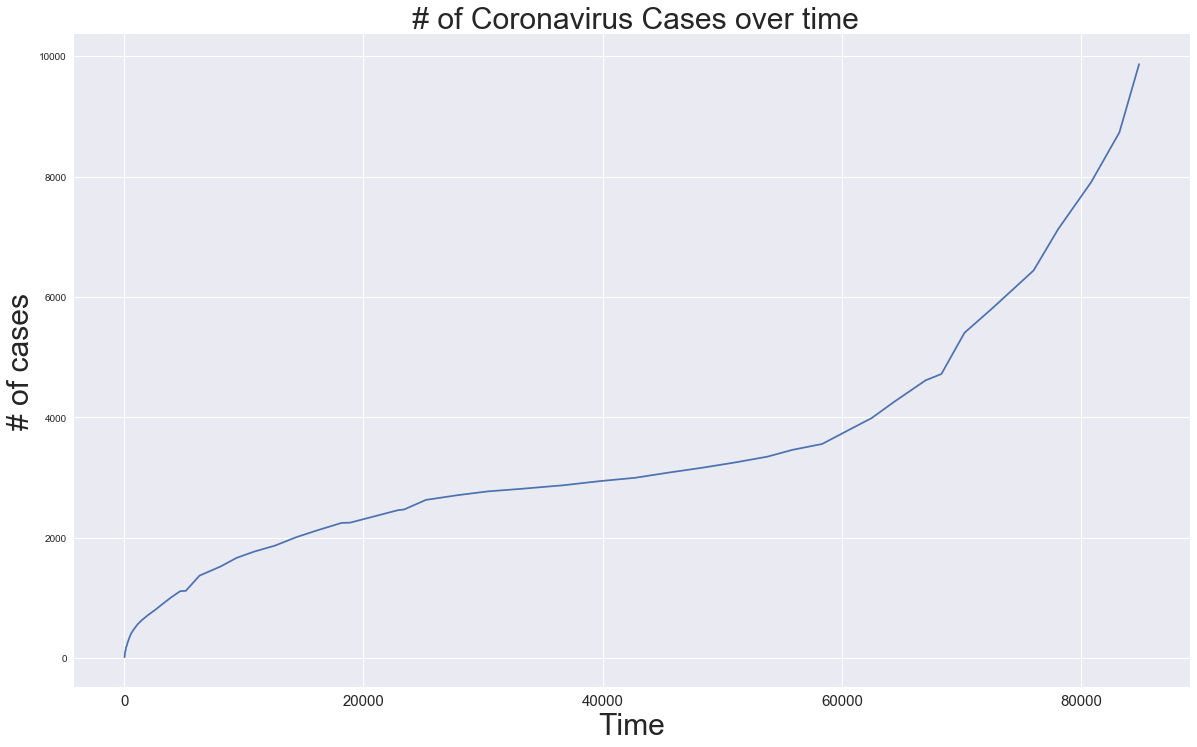

In [83]:
plot_covid_figure(total_recovered, total_deaths)

In [85]:
# plt.figure(figsize=(20, 12))
# plt.plot(total_recovered, total_deaths)
# plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
# plt.xlabel('# of Coronavirus Recoveries', size=30)
# plt.ylabel('# of Coronavirus Deaths', size=30)
# plt.xticks(size=15)
# plt.show()

In [86]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [87]:
# getting information about countries

unique_countries = list(confirmed_df['Country/Region'].unique())

In [89]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if(cases > 0):
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
    
for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key = operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']== unique_countries[i]].sum()

In [92]:
print('Confirmed cases by countrues/ regions')
for i in range(len(unique_countries)):
    print(f'{i+ 1} , {unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by countrues/ regions
1 , China: 81156 cases
2 , Italy: 41035 cases
3 , Iran: 18407 cases
4 , Spain: 17963 cases
5 , Germany: 15320 cases
6 , US: 13677 cases
7 , France: 10947 cases
8 , Korea, South: 8565 cases
9 , Switzerland: 4075 cases
10 , United Kingdom: 2716 cases
11 , Netherlands: 2467 cases
12 , Austria: 2013 cases
13 , Belgium: 1795 cases
14 , Norway: 1746 cases
15 , Sweden: 1439 cases
16 , Denmark: 1225 cases
17 , Japan: 924 cases
18 , Malaysia: 900 cases
19 , Canada: 800 cases
20 , Portugal: 785 cases
21 , Cruise Ship: 712 cases
22 , Czechia: 694 cases
23 , Australia: 681 cases
24 , Israel: 677 cases
25 , Brazil: 621 cases
26 , Ireland: 557 cases
27 , Qatar: 460 cases
28 , Pakistan: 454 cases
29 , Greece: 418 cases
30 , Finland: 400 cases
31 , Poland: 355 cases
32 , Singapore: 345 cases
33 , Luxembourg: 335 cases
34 , Iceland: 330 cases
35 , Indonesia: 311 cases
36 , Slovenia: 286 cases
37 , Bahrain: 278 cases
38 , Romania: 277 cases
39 , Saudi Arabia: 274 ca

In [93]:
unique_provinces = list(confirmed_df['Province/State'].unique())

outliers = ['United Kingdom', 'Denmark', 'France']

for i in outliers:
    unique_provinces.remove(i)

In [94]:
province_confirmed_cases = []
no_cases = []

for i in unique_provinces:
    cases = latest_confirmed[confirmed_df['Province/State'] == i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_provinces)):
    print(f'{i+1}. {unique_provinces[i]}: {province_confirmed_cases[i]} cases')

1. Hubei: 231 cases
2. New York: 307 cases
3. Netherlands: 121 cases
4. Guangdong: 144 cases
5. Washington: 42 cases
6. Henan: 52 cases
7. Zhejiang: 10 cases
8. Hunan: 1 cases
9. Anhui: 257 cases
10. California: 119 cases
11. Jiangxi: 121 cases
12. Shandong: 1376 cases
13. Diamond Princess: 5365 cases
14. New Jersey: 952 cases
15. Jiangsu: 328 cases
16. Chongqing: 759 cases
17. Sichuan: 31 cases
18. Heilongjiang: 287 cases
19. Beijing: 277 cases
20. Illinois: 417 cases
21. Florida: 742 cases
22. Louisiana: 88 cases
23. Shanghai: 260 cases
24. Michigan: 422 cases
25. Massachusetts: 206 cases
26. Hebei: 44 cases
27. New South Wales: 107 cases
28. Fujian: 123 cases
29. Georgia: 81 cases
30. Colorado: 154 cases
31. Texas: 99 cases
32. Ontario: 45 cases
33. Guangxi: 60 cases
34. Shaanxi: 37 cases
35. British Columbia: 40 cases
36. Hong Kong: 95 cases
37. Pennsylvania: 44 cases
38. Yunnan: 89 cases
39. Hainan: 29 cases
40. Wisconsin: 119 cases
41. Connecticut: 44 cases
42. Tennessee: 159 cas

In [95]:
# handling na

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indicese.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

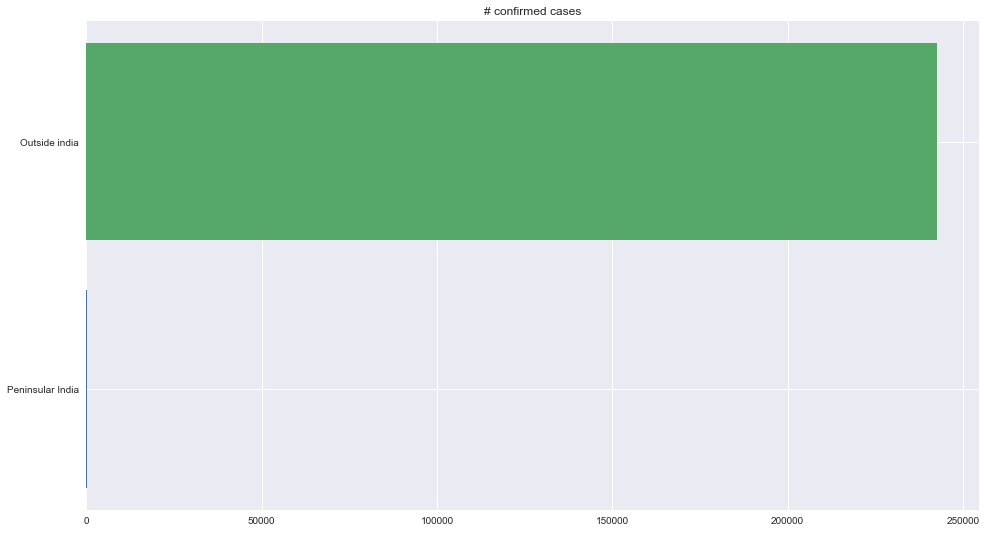

In [102]:
# india confirmed
india_confirmed = latest_confirmed[confirmed_df['Country/Region']=='India'].sum()
outside_india_confirmed = np.sum(country_confirmed_cases) - india_confirmed

plt.figure(figsize=(16,9))
plt.barh('Peninsular India', india_confirmed )
plt.barh('Outside india', outside_india_confirmed)
plt.title('# confirmed cases')
plt.show()